<a href="https://colab.research.google.com/github/Elwing-Chou/ximen0703/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

準備資料多寡 = 問題難易度(欄位多寡)

1. 機器學習: k-w
2. 深度學習: w-10w

In [14]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
# DataFrame(2D) Series(1D)
data = pd.DataFrame(iris["data"], columns=iris["feature_names"])
data["ans"] = iris["target"]
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
from sklearn.model_selection import train_test_split
x = data.drop("ans", axis=1)
y = data["ans"]
# [90% x, 10% x, 90% y, 10% y]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [16]:
# demo
train_test_split([1, 2, 3, 4, 5],
         [6, 7, 8, 9, 10],
         test_size=0.2)

[[5, 2, 4, 1], [3], [10, 7, 9, 6], [8]]

In [17]:
# demo
d = pd.DataFrame([
    [1, 2],
    [3, 4]
], columns=["a", "b"], index=["a", "b"])
d.drop("a", axis=1)

,b
a,2
b,4


In [18]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 135\nvalue = [47, 43, 45]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 47\nvalue = [47, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 88\nvalue = [0, 43, 45]\nclass = virginica'),
 Text(0.4, 0.16666666666666666, 'gini = 0.159\nsamples = 46\nvalue = [0, 42, 4]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.046\nsamples = 42\nvalue = [0, 1, 41]\nclass = virginica')]

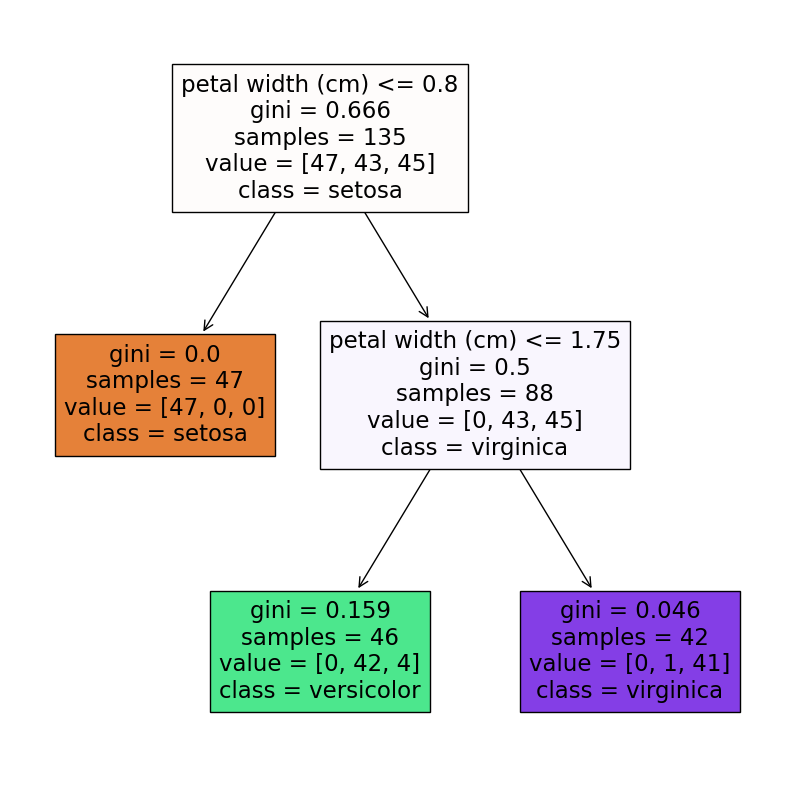

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=[10, 10])
plot_tree(clf,
     feature_names=x.columns,
     class_names=iris["target_names"],
     filled=True)

In [20]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(y_test, pre)

0.9333333333333333